<a href="https://colab.research.google.com/github/HamidMandi/MNE/blob/main/BA_Signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
! pip install mne

     |████████████████████████████████| 6.9 MB 14.2 MB/s 


In [59]:
import numpy as np
import mne
import matplotlib.pyplot as plt


In [120]:
fname = "/content/gdrive/MyDrive/Colab Notebooks/MNE/eeg/BA signlas/BA signal 06.csv"

data = np.loadtxt(fname, skiprows=2)
ch_names = ["O2", "Oz", "O1", "Fp2", "Fpz", "Fp1",
            "X", "Y", "Z"] 
ch_types = ["eeg", "eeg", "eeg", "eeg", "eeg","eeg",
            "grad", "grad","grad"]
eeg_channels = ["O2", "Oz", "O1", "Fp2","Fpz", "Fp1"] 
sfreq = 125
data = data.T     #numer of channels x info
data.shape


(9, 623)

In [121]:
info = mne.create_info(ch_names, sfreq, ch_types)
raw = mne.io.RawArray(data, info)
raw.info

Creating RawArray with float64 data, n_channels=9, n_times=623
    Range : 0 ... 622 =      0.000 ...     4.976 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: O2, Oz, O1, Fp2, Fpz, Fp1, X, Y, Z
 chs: 6 EEG, 3 GRAD
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 9
 projs: []
 sfreq: 125.0 Hz
>

In [122]:
eeg = raw.copy().pick_channels(ch_names=eeg_channels)
eeg.info

<Info | 7 non-empty values
 bads: []
 ch_names: O2, Oz, O1, Fp2, Fpz, Fp1
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 125.0 Hz
>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


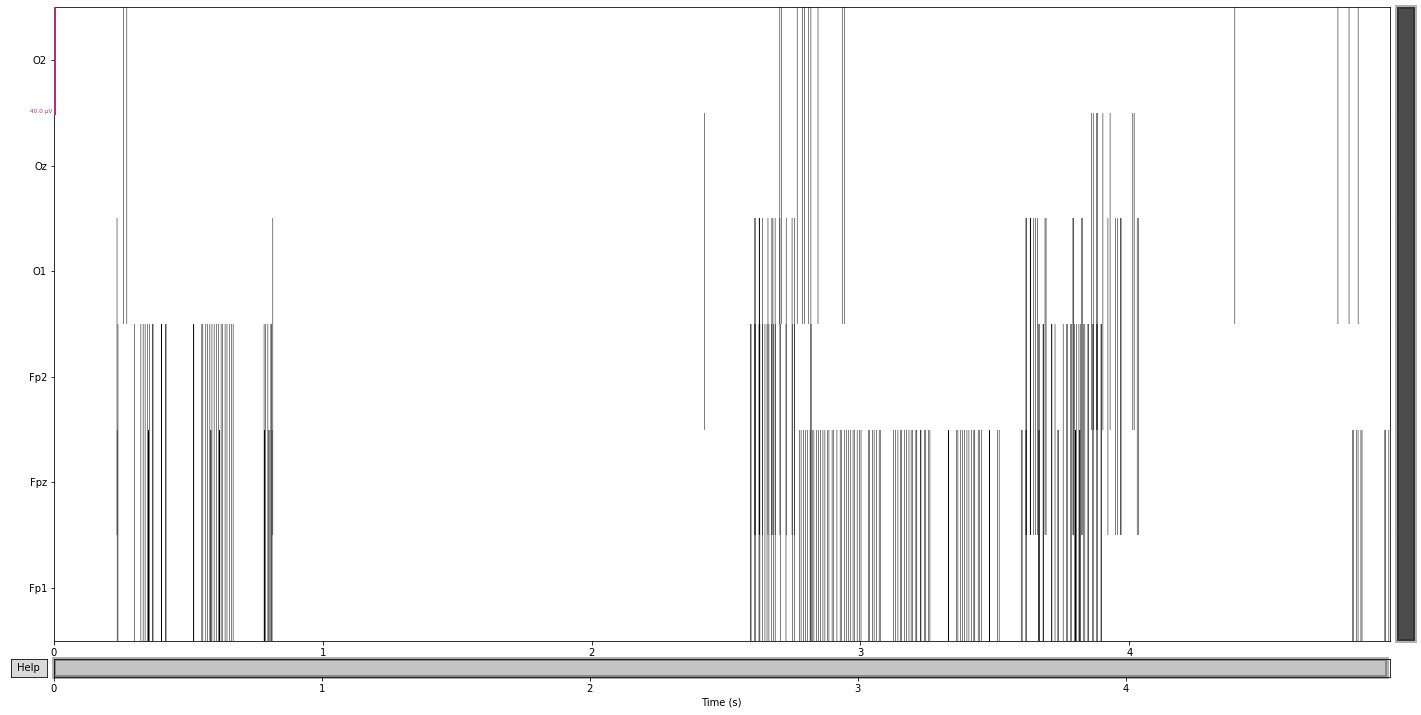

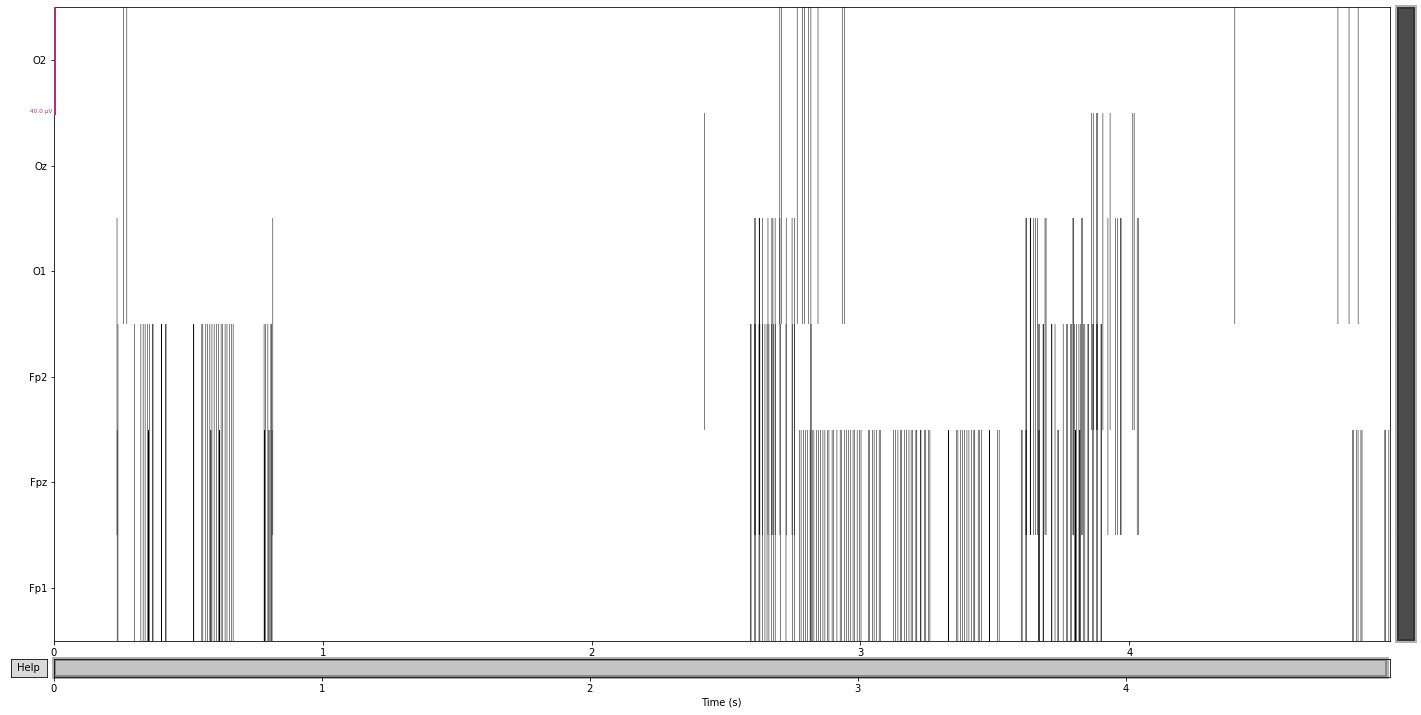

In [123]:
plt.rcParams["figure.figsize"]=20, 10
eeg.plot(duration=5, n_channels=6)

Effective window size : 4.984 (s)


<ipython-input-79-6254faa27bf1>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  eeg.plot_psd()


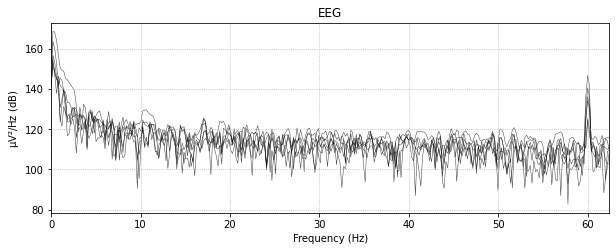

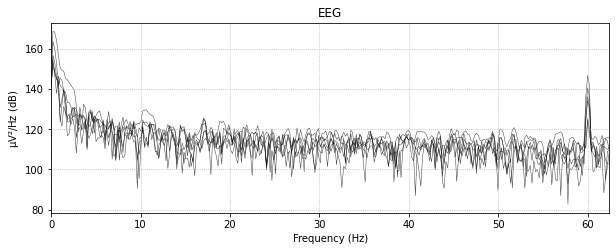

In [79]:
eeg.plot_psd()

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


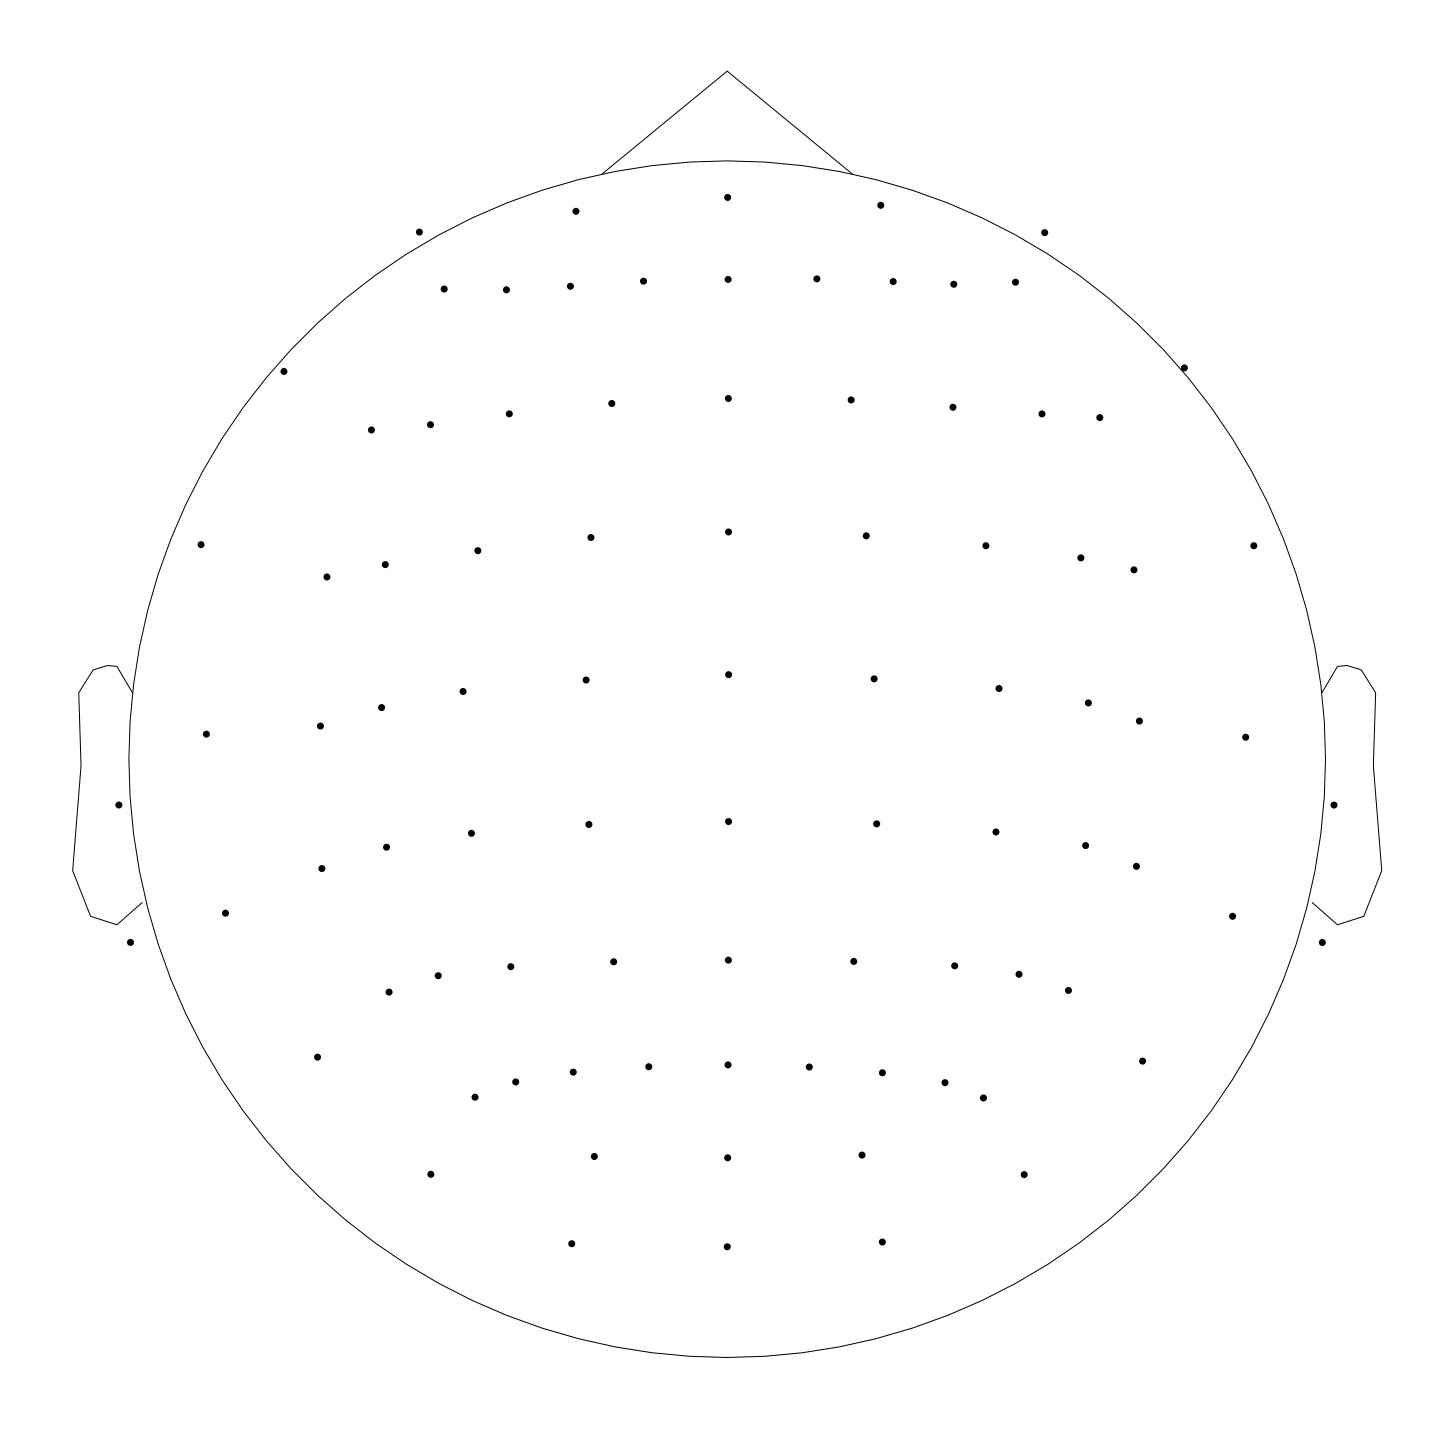

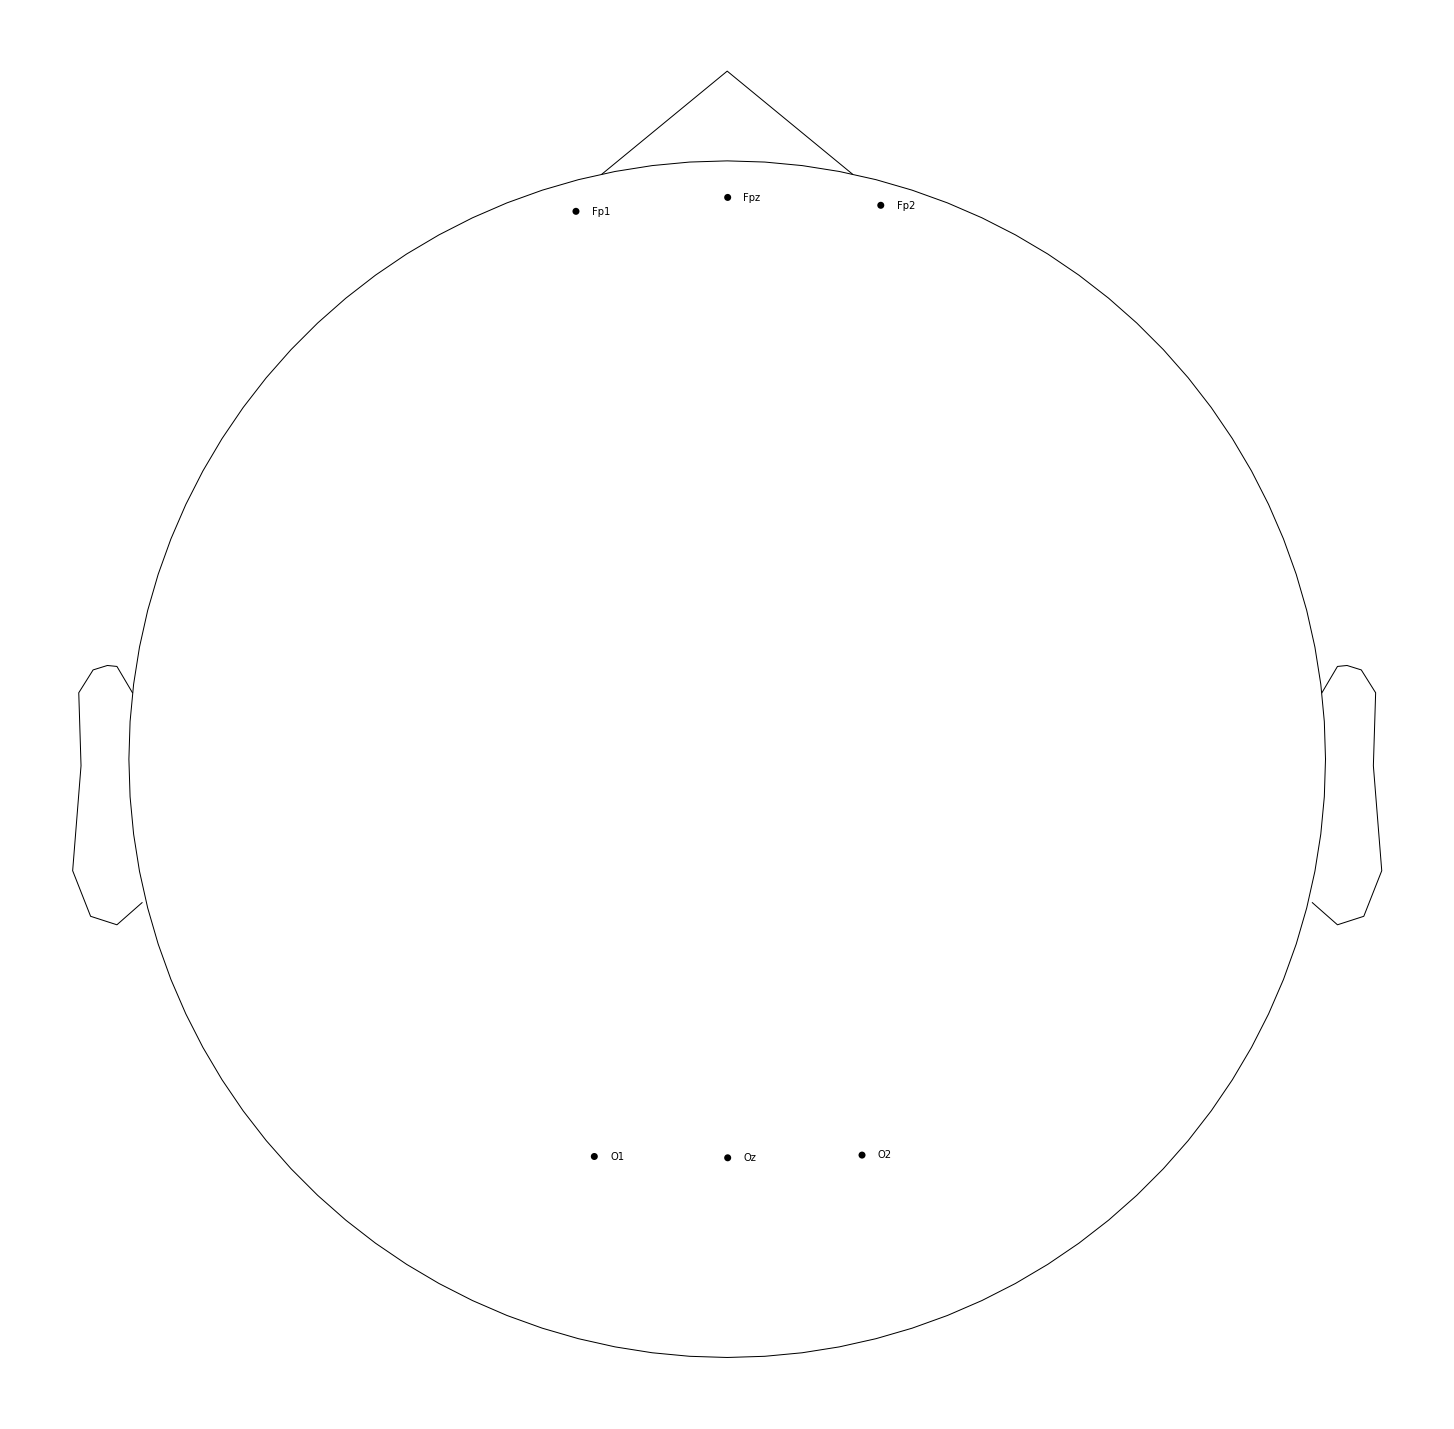

In [87]:
montage = mne.channels.make_standard_montage('standard_1020')
eeg_mont = eeg.set_montage(montage)
_ = montage.plot(kind='topomap', show_names=False)
_ = eeg_mont.plot_sensors(show_names=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


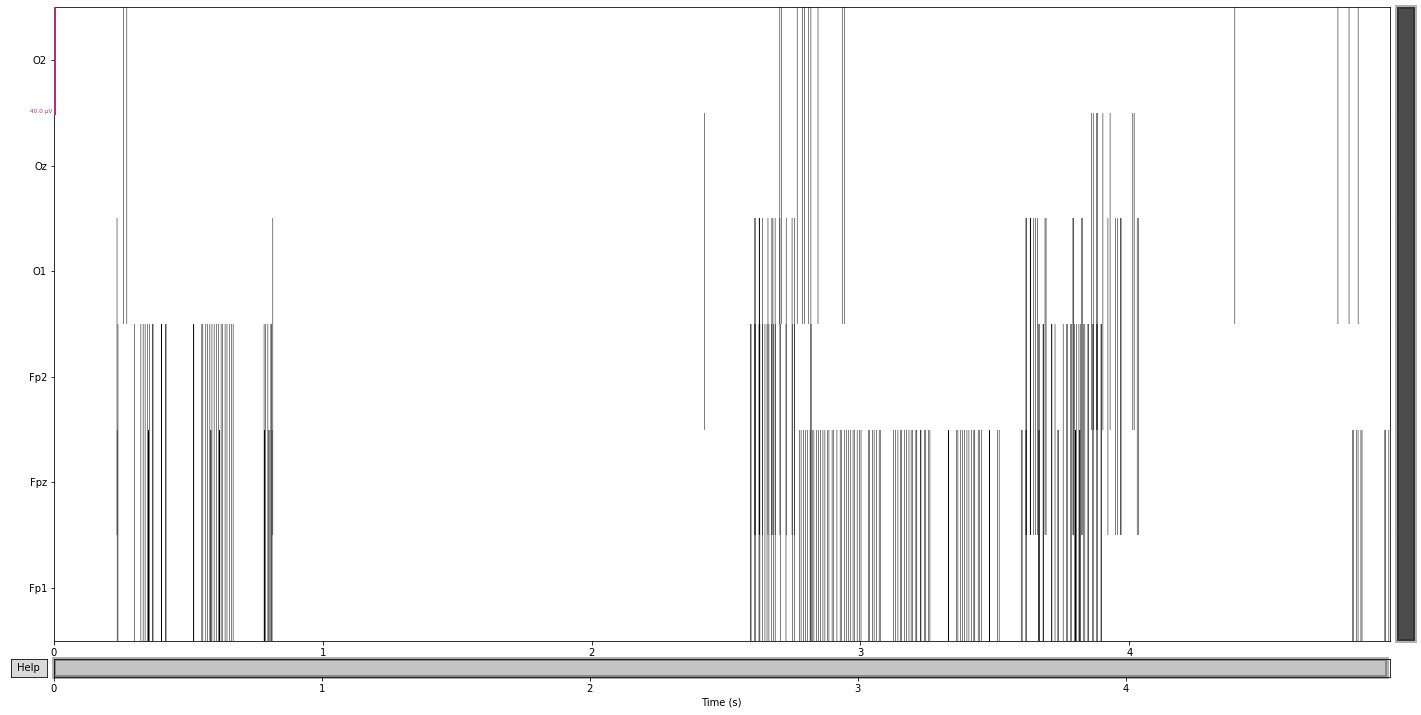

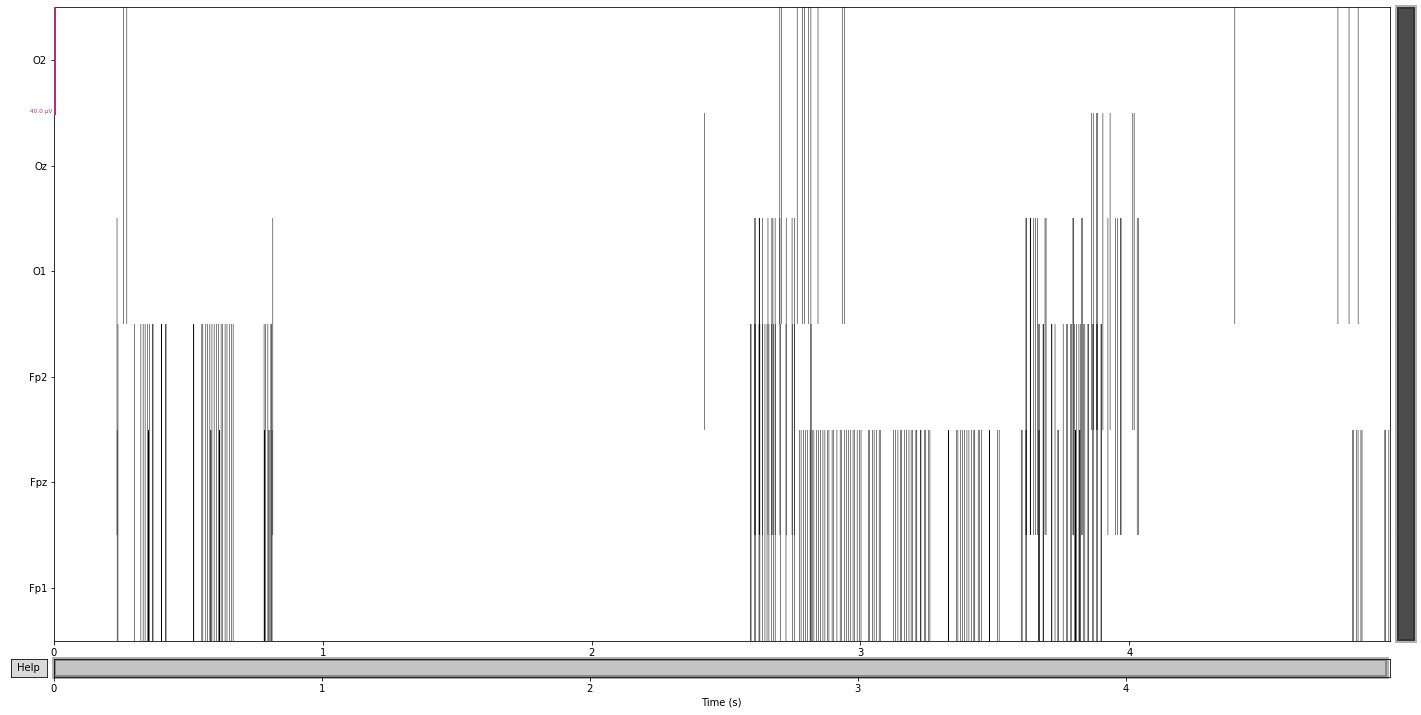

In [88]:
eeg_mont.plot()